# Assignment 1 (shortened)

This notebook contains three exercises from the exercise sets we covered prior to moving the teaching online. It will count as one of the two assignments you need to submit to qualify for the exam. **The deadline** for handing in this assignment is **April 3.** You hand in by pushing your solutions to your folder in the exercise repo.

## Problems from exercise set 2
> **Ex. 2.1.1**: The performance of a random forest classifier is highly sensitive to hyper parameters. Therefore, you should be intimately familiar with what the most important ones do. For each point below, explain what the hyper parameter pertaining to `sklearn.ensemble.RandomForestClassifier` controls, and how setting it either too low or too high (or True/False) might hurt model performance:
1. `n_estimators`
2. `max_depth`
3. `max_features`
4. `bootstrap`

*Solution Laura* 

**1) n_estimators:** specifies the number of trees in the forest. The default value is set to 100. The higher the number of trees in the forest, the higher the quality of the meta-estimator via averaging (meaning, better generalization performance, less sensitive to noise, lower overall error, robust to overfitting). The more sub-samples, i.e. the more trees, i.e. the higher we set n_estimators, we have that enter the averaging process, the better we can control overfitting and the more predicitve accuracy we reach. Yet, a high number of trees increases the time the random forest needs proportionally. Setting the number of n_estimators too low, however, comes at the expense of performance/accuracy of the meta-estimator. 

**2) max_depth:** specifies the maximum depth of the tree. If set to "none", nodes are expanded until all leaves are pure or or until all leaves contain less than min_samples_split samples, that is the minimum number of samples required to split an internal node. If max_depth is set to some integer, nodes are only extended integer times. If set to none, the depth is set to maximum, which is associated with an increase in both model performance and time to build and run random forest. The trees are split more often and are more likely yo reach a pure split promoting accuracy. Vice versa, if max_depth is set to some integer < none, we would observe an increase in runtime pace and a decrease in model performance. 

**3) max_features:** specifies the number of features to consider when looking for the best split. 
Pertaining to sklearn.ensemble.RandomForestClassifier: 
- If int, then consider max_features features at each split.
- If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
- If “auto”, then max_features=sqrt(n_features).
- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
- If “log2”, then max_features=log2(n_features).
- If None, then max_features=n_features.

with n_features being all available variables, the higher we set max_features the more likely relevant variables will be picked up at the split, especially when the number of n_features is large and the number of relevant/important features is small. In this case, model performance will be poorly with max_features set to a too low value. Yet, including all features at each split for consideration (max_features = n_features) comes with time costs. All of the other above options would  consider a smaller but randomized fraction of all available features, such as the default, the squareroot of all features. This does seem to not hurt performance that much and is not as computationally expensive. 
Often, the best values depend on the problem at hand and need to be "tuned".


**4) bootstrap:** specifies if the subsamples for each tree are drawn with (True) or without (False) replacement from the training data. If false, the whole dataset is used for building each tree. That being said, one would not benefit from a **random** forest as much, if the samples for each tree are the same, potentially decreasing model performance: The idea of bagging, i.e. aggregate bootstrapping/bootstrapping repeatedly, is to take the average of many noisy, yet unbiased trees, to reduce overall variance. This model performance characteristic would be lost if bootstrap was set to false. 




> **Ex. 2.1.2**: For `n_estimators > 1`how should one set the hyper-parameters `max_features` and `bootstrap` so that all the trees in the ensemble end up identical?

*Solution Laura* 

Given n_estimators > 1, that is more than one tree in the forest, the first thing to consider would be to have identical subsamples from the training data for each tree. This can be obtained by setting **bootstrap = False**. This way, the whole dataset is used for each tree instead of sampling from it with replacement. Now, at each split, we would need to make sure that the same variables/features are considered when looking for the best split. This can be appraoched with setting **max_features=n_features**, that is to include at each split all features. Given the same data each tree operates on, the selection should be identical. If not deterministic, a random_state should be fixed. 

## Problems from exercise set 3

> **Ex. 3.1.2**: Reproduce the figure from the slides that compares PCA, LDA, t-SNE and UMAP as applied to the digits dataset.
1. Do it for the digits dataset (same as in slides)
2. Do it also for the wine dataset. What problems do you observe if you don't standardize the wine dataset? Why is this not a problem with the digits data?
3. Comment on the differences you observe as well as the applicability (and necessity thereof) of different methods for different data.
>
> *Hint: You can use [this class](https://github.com/ulfaslak/ulf_pytools/blob/7f4f1eb7e2d721851c8dacb20904478b19090f2a/ulf.py#L451) for making coloring easier. It lets you create a function that takes a category as input and returns an associated color. Read the docstring for usage example.*

In [165]:
# Solution Laura 

#PRES

#load libraries and data
import pandas as pd
import numpy as np
import matplotlib.pylab as plt 
from scipy import interpolate # for color/cmap class
from scipy.interpolate import interp1d # for color/cmap class
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits

#wine data set
data_wine = load_wine()
X_wine = data_wine['data'] # high dimensional data subject to reduction
y_wine = data_wine['target'] # wine classes: 0,1,2

#digits data set
data_digits = load_digits()
X_digits = data_digits['data'] # high dimensional data subject to reduction
y_digits = data_digits['target'] # class code: digits 1,2,3,4,5,6,7,8,9

# load decompositions libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis() 
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
#from sklearn.manifold import SpectralEmbedding
#umap0 = SpectralEmbedding(n_components = 2)
#!pip uninstall umap
#!pip uninstall umap-learn
#!pip install umap-learn

import umap
reducer = umap.UMAP()

# color class
class cmap_in_categories:
    """Create map to range of colors inside given categories.
    Example
    -------
    >>> cmap = cmap_in_categories(['cats', 'dogs', 'squirrels'])
    >>> cmap('squirrels')
    (0.30392156862745101, 0.30315267411304353, 0.98816547208125938, 1.0)
    """
    def __init__(self, cmap_categories, cmap_range=[0, 1], cmap_style='rainbow'):
        self.cmap_domain_map = dict(list(zip(cmap_categories, list(range(len(cmap_categories))))))
        self.cmap_domain = [min(self.cmap_domain_map.values()), max(self.cmap_domain_map.values())]
        self.cmap_categories = cmap_categories
        self.cmap_range = cmap_range
        self.m = interp1d(self.cmap_domain, self.cmap_range)
        self.cmap = plt.get_cmap(cmap_style)
        
    def __call__(self, category):
        if not category in self.cmap_categories:
            raise Exception("Category must be inside cmap_categories.")
        return self.cmap(self.m(self.cmap_domain_map[category]))

/Users/qbj218/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Text(0, 0.5, '2nd component')

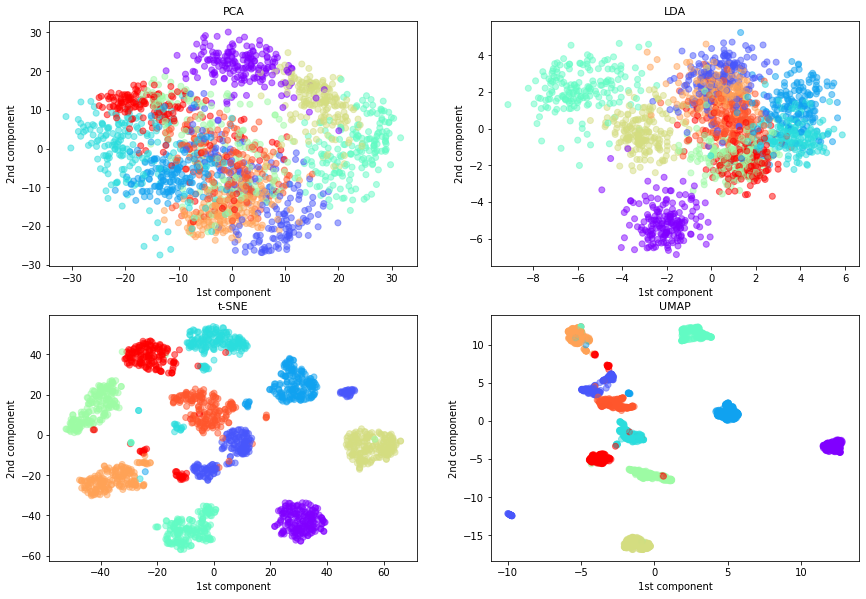

In [166]:
### 1) DIGITS DATA

cmap = cmap_in_categories(sorted(set(y_digits))) #produces sorted category list [1,2,..,8,9] which can be fed into Ulf's color class function

## PCA 
X_digits_pca = PCA().fit_transform(X_digits)[:, :2] #pc1 and pc2
plt.subplot(2,2,1) #nrows, ncols, index, set plotting environment to accompany for 2x2 plots
plt.subplots_adjust(right=2) #adjust distances between plots to prevent overlapping
plt.scatter(X_digits_pca[:, 0], X_digits_pca[:, 1], c=[cmap(y_) for y_ in y_digits], alpha=0.5) # color coding takes place according to classes 1-9
plt.title('PCA',fontsize=11)
plt.xlabel("1st component",fontsize=10)
plt.ylabel("2nd component",fontsize=10)

## LDA
X_digits_lda = lda.fit_transform(X_digits,y_digits)[:, :2] #only in LDA, y_digits, our target classes, is incorporated in the fitting: maximize variance between classes! Supervised method
plt.subplot(2,2,2)
plt.scatter(X_digits_lda[:, 0], X_digits_lda[:, 1], c=[cmap(y_) for y_ in y_digits], alpha=0.5)
plt.title('LDA',fontsize=11)
plt.xlabel("1st component",fontsize=10)
plt.ylabel("2nd component",fontsize=10)

## t-SNE
X_digits_tsne = tsne.fit_transform(X_digits)
plt.subplot(2,2,3)
plt.subplots_adjust(top=2)
plt.scatter(X_digits_tsne[:, 0], X_digits_tsne[:, 1], c=[cmap(y_) for y_ in y_digits], alpha=0.5)
plt.title('t-SNE',fontsize=11)
plt.xlabel("1st component",fontsize=10)
plt.ylabel("2nd component",fontsize=10)

## UMAP 
X_digits_umap = reducer.fit_transform(X_digits)
plt.subplot(2,2,4)
plt.scatter(X_digits_umap[:, 0],X_digits_umap[:, 1], c=[cmap(y_) for y_ in y_digits], alpha=0.5) #add color
plt.title('UMAP',fontsize=11)
plt.xlabel("1st component",fontsize=10)
plt.ylabel("2nd component",fontsize=10)


Text(0, 0.5, '2nd component')

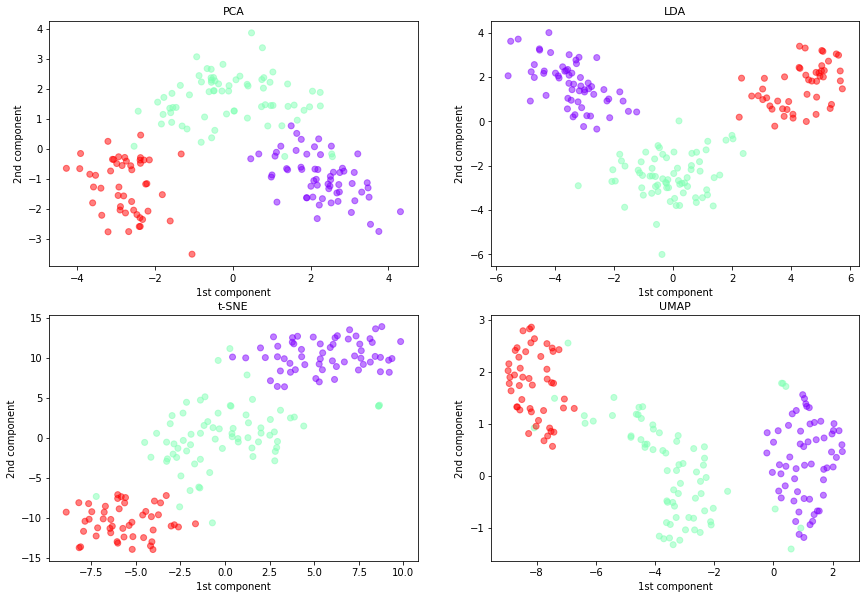

In [167]:
### 2) WINE DATA

#standardize wine data set
X_wine_std = StandardScaler().fit_transform(X_wine)
#X_wine_std = X_wine # to see and check what happens if not standardized

cmap = cmap_in_categories(sorted(set(y_wine))) #produces sorted category list [0,1,2] which can be fed into Ulf's color class function


## PCA 
X_wine_pca = PCA().fit_transform(X_wine_std)[:, :2] #pc1 and pc2
plt.subplot(2,2,1) #nrows, ncols, index
plt.subplots_adjust(right=2)
plt.scatter(X_wine_pca[:, 0], X_wine_pca[:, 1], c=[cmap(y_) for y_ in y_wine], alpha=0.5)
plt.title('PCA',fontsize=11)
plt.xlabel("1st component",fontsize=10)
plt.ylabel("2nd component",fontsize=10)

## LDA
X_wine_lda = lda.fit_transform(X_wine_std,y_wine)[:, :2] #check if you can refer the same way to pc1 and 2 here
plt.subplot(2,2,2)
leg=plt.scatter(X_wine_lda[:, 0], X_wine_lda[:, 1], c=[cmap(y_) for y_ in y_wine], alpha=0.5)
plt.title('LDA',fontsize=11)
plt.xlabel("1st component",fontsize=10)
plt.ylabel("2nd component",fontsize=10)

## t-SNE
X_wine_tsne = tsne.fit_transform(X_wine_std)
plt.subplot(2,2,3)
plt.subplots_adjust(top=2)
plt.scatter(X_wine_tsne[:, 0], X_wine_tsne[:, 1], c=[cmap(y_) for y_ in y_wine], alpha=0.5)
plt.title('t-SNE',fontsize=11)
plt.xlabel("1st component",fontsize=10)
plt.ylabel("2nd component",fontsize=10)

## UMAP 
X_wine_umap = reducer.fit_transform(X_wine_std)
plt.subplot(2,2,4)
plt.scatter(X_wine_umap[:, 0],X_wine_umap[:, 1], c=[cmap(y_) for y_ in y_wine], alpha=0.5) #add color
plt.title('UMAP',fontsize=11)
plt.xlabel("1st component",fontsize=10)
plt.ylabel("2nd component",fontsize=10)


**2.2 What problems do you observe if you don't standardize the wine dataset? Why is this not a problem with the digits data?**

*Solution Laura* 

Standardizing, that is substracting the mean from each entry and dividing by the standard deviation, mean-centers the data. The features then have the properties of a standard normal distribution with a mean of zero and a standard deviation of one. If we do not standardize, we would be misled since variables can have very different variances, measured in different, non-comparable units. Example: if one has observations from both females and males, the variable "height" or "hairlength" would have rather different variances for boys and girls, respectively. Given, e.g., a higher variance for "height" among boys, this variable would be weighted much more heavily since it explain the present variance to a greater extent. This, however, is not a useful interpretation. 
In the wine data set we are dealing with a number (13) of physical and chemical variables, of which some have a very high variance. Dimensionality reduction methods such as pca find projections with maximal variance, hence weighing those variabels more heavily. As a result, our result is strongly biased and not useful. The score plots below do not describe the pattern in the data well.

Each data point in the digits data set, on the other hand, is measured in the same way, units are comparable, as well as variances. Each 8x8 pixel picture is transformed in an array with 64 values with integer values in the same range.

Text(0, 0.5, '2nd component')

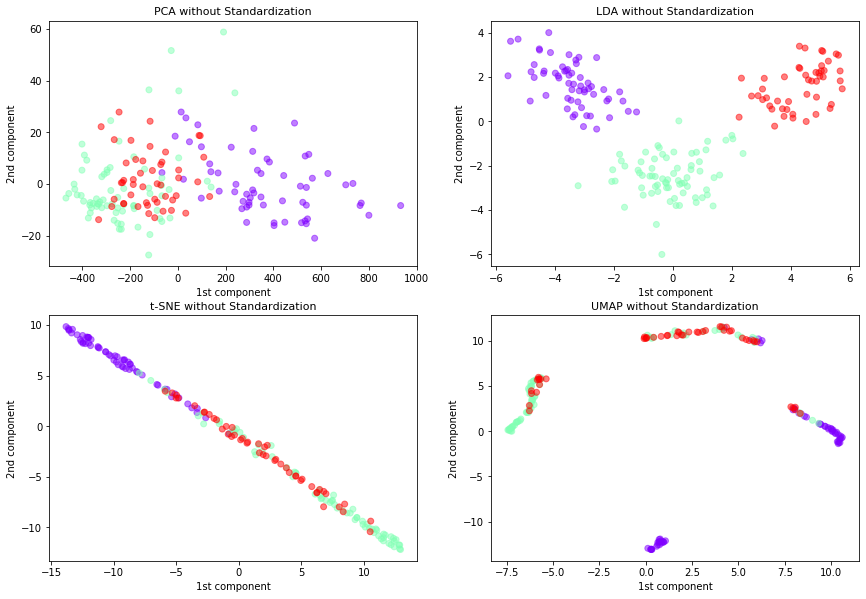

In [168]:
### 2.2) WINE DATA

# DONT standardize wine data set
#X_wine_std = StandardScaler().fit_transform(X_wine)
X_wine_std = X_wine # to see and check what happens if not standardized

cmap = cmap_in_categories(sorted(set(y_wine))) #produces sorted category list [0,1,2] which can be fed into Ulf's color class function

## PCA 
X_wine_pca = PCA().fit_transform(X_wine_std)[:, :2] #pc1 and pc2
plt.subplot(2,2,1) #nrows, ncols, index
plt.subplots_adjust(right=2)
plt.scatter(X_wine_pca[:, 0], X_wine_pca[:, 1], c=[cmap(y_) for y_ in y_wine], alpha=0.5)
plt.title('PCA without Standardization',fontsize=11)
plt.xlabel("1st component",fontsize=10)
plt.ylabel("2nd component",fontsize=10)

## LDA
X_wine_lda = lda.fit_transform(X_wine_std,y_wine)[:, :2] #check if you can refer the same way to pc1 and 2 here
plt.subplot(2,2,2)
plt.scatter(X_wine_lda[:, 0], X_wine_lda[:, 1], c=[cmap(y_) for y_ in y_wine], alpha=0.5)
plt.title('LDA without Standardization',fontsize=11)
plt.xlabel("1st component",fontsize=10)
plt.ylabel("2nd component",fontsize=10)

## t-SNE
X_wine_tsne = tsne.fit_transform(X_wine_std)
plt.subplot(2,2,3)
plt.subplots_adjust(top=2)
plt.scatter(X_wine_tsne[:, 0], X_wine_tsne[:, 1], c=[cmap(y_) for y_ in y_wine], alpha=0.5)
plt.title('t-SNE without Standardization',fontsize=11)
plt.xlabel("1st component",fontsize=10)
plt.ylabel("2nd component",fontsize=10)

## UMAP 
X_wine_umap = reducer.fit_transform(X_wine_std)
plt.subplot(2,2,4)
plt.scatter(X_wine_umap[:, 0],X_wine_umap[:, 1], c=[cmap(y_) for y_ in y_wine], alpha=0.5) #add color
plt.title('UMAP without Standardization',fontsize=11)
plt.xlabel("1st component",fontsize=10)
plt.ylabel("2nd component",fontsize=10)



**3) Comment on the differences you observe as well as the applicability (and necessity thereof) of different methods for different data.**

*Solution Laura* 

**Differences:**
WINE: With regard to seperation of classes, LDA performs best in maximizing the seperation of classes, given its supervised nature, i.e. it knows the classes. With all other methods, we observe some color-coded "outliers" that do not stick to their class in the 2-dimensional space given component 1 and 2. The non-linear methods UMAP and t-SNE do not perform significantly better than the linear methods. This indicates, that the linear projections actually give us a nice sense of how points are distributed in higher dimensions. There is not so much a necessity for non-linear dimensionality reductions. 

DIGITS: Now, we can clearly spot that the non-linear methods perform better than PCA and LDA. A tad ahead of t-SNE, UMAP best represents the 9 digits with the first two components. Hence, allowing a projection onto any kind of surface,manifold, we succeed in putting the points close to each other in the projection if they are close to each other in the original data space. Yet, also from the linear methods one can spot some kind of score clusters, but not well seperated in the classes. This seperation improves from PCA, to LDA, to t-SNE and is best with UMAP. 

**Applicability and necessity for each dimensionality reduction method** 
All methods reduce high-dimensional data to fewer dimensions/components, makes analysis more efficient -> applicability. 

**PCA**:Especially applicable, if one does not know the classes. PCA is an unsupervised learning method that can uncover hidden patterns and is useful in an explorative setting by accounting for the most variance in the data. Necessary if one does not know the classes, or has no idea about pattern in the data yet. One may then discover dependecies between variables. 

**LDA**:Especially applicable if one knows the classes. Then, the method tries to identify the varaibles, that account for most varaince between the known classes. 

**t-SNE**: idea is to place neighbors next to each other, ignoring the high-dimensional data structure. Very applicable for visualisation purposes.

**UMAP**: same idea like t-SNE, but distances and size of "clusters" can be interpreted from visualization i.e. pertaining to the global data structure. 

With t-SNE and UMAP, we find a necessity to use those instead of linear methods, if high dimensional vectors vary in a non-linear way. Both UMAP and t-SNE are not as scalable as linear methods.



## Problems from exercise set 4

In this problem we will try to implement and understand some of the ideas used in [Athey, Imbens (2015)](https://www.pnas.org/content/pnas/113/27/7353.full.pdf) to develop _Honest Inference_ in desicion tree models. The paper begins by covering honesty in a setting of population averages, and for estimating conditional means; so you will need to look towards the second half of the paper to get an impression of it's use for treatment-effect estimation.

> **Ex. 4.2.1:** What does it mean that a tree is _honest?_ In particular what are the implications in terms of 
> * The intuition for why honesty is required in order to get good local treatment effect estimates?
> * The practical implementation of the DT algorithm?

**1) WHAT does it mean that a tree is honest?**

*Solution Laura* 

A honest model does not use the same information for selecting the partitions of the covariate space as for estimation. This is done by splitting data into two parts. One part is used to construct the tree, and the other parts is used to estimate the treatment effects within tree leaves.

A honest tree thus estimates average treatment effects locally for each group/leaf analogous to local matching! One constructs counterfactual potential treated and control units and matches observations across treatment and control based on similarity.

This is done by means of one sample being used to construct the partition and another is used to estimate treatment effects for each sub-sample. Bias, such as spurious corrleations between covariates and outcomes, will be eliminated with a honest model criterion. This is, because the estimation will be performed on an independent sample (because the partitions have asymptotic properties  as if they were exogenously given).  

**2) What is the intuition for WHY honesty is required in order to get good local treatment effect estimates?**

*Solution Laura* 

Matching control for used covariates excludes (observable) confounders --> may improve precision of treatment estimate of experiments (less variance) --> causal effects. Yet, matching does not unconfound generally, unobserved factors may still confound, as Athey and Imbens (2016) put it, "ground truth" for a causal effect is not obervable. Especially here an issue since with treatment effects one does not observe the value of the treatment effect whose conditional mean one aims at estimating, complicates criteria (e.g. MSE) calculations.

Honesty takes into account that estimation is done on a sample separate from the sample used for constructing the partition.

The criteria reward a partition for finding strong heterogeneity in treatment effects and penalize a partition that creates variance in leaf estimates.
Reduce variance of treatment effect estimator by means of split -> more homogenous leaves.

The difference in honest criteria is how the within-leaf MSE is weighted: the honest criterion penalizes small leaf size --> ensure enough treatment and control in each leaf


**3) What are the implications in terms of the Decision Tree algorithm (HOW)?**

*Solution Laura* 

1) Half of sample ($\mathcal{S}^{tr}$) for training decision tree
- partitions X into categories based outcome similarity
- apply new criteria:  expected MSE (in hypothetical test set): 
$\mathbb{E}[\underset{=MSE}{\underbrace{(Y_i-\bar{Y}_i)^2}} - Y_i^2]$
Idea: new term $Y_i^2$ penalizes small leaves so that we end up with leaves that have enough treatment and control in each leaf
    
2) Other half ($\mathcal{S}^{est}$) for estimating treatment effects, that is to measure treatment effects in each partition group (=leaf in tree model)

This is similar to splitting into train and test
- prevents data-leakage
- allows honest evaluation of model performance! 

